In [698]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [699]:
pd.__version__

'2.3.1'

In [700]:
df = pd.read_csv("car_fuel_efficiency.csv")
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [701]:
new_order = ['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']

In [702]:
df1 = df[new_order]
df1

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [703]:
df2 = df1

In [704]:
df1.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [705]:
df1 = df1.dropna()
df1.isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
fuel_efficiency_mpg    0
dtype: int64

In [706]:
median = np.median(df1['horsepower'])
median

np.float64(149.0)

In [707]:
df1.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,8996.000000,8996.000000,8996.000000,8996.000000,8996.000000
mean,199.837706,149.657292,3000.662057,2011.475656,14.988530
std,49.455021,29.879555,498.870631,6.652192,2.562296
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2665.291955,2006.000000,13.271888
50%,200.000000,149.000000,2992.849725,2011.000000,15.003604
75%,230.000000,170.000000,3335.165088,2017.000000,16.713268
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


<Axes: xlabel='horsepower', ylabel='Count'>

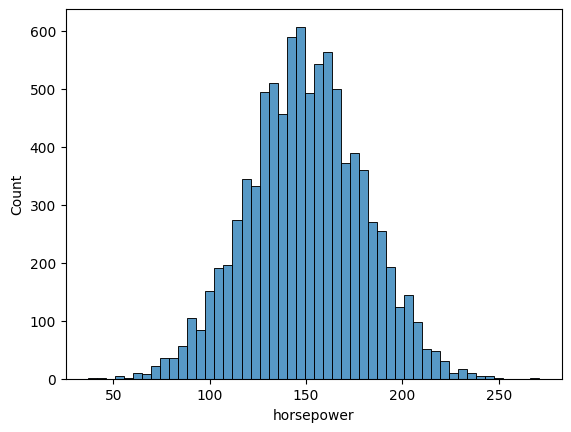

In [708]:
sns.histplot(df1.horsepower, bins=50)

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

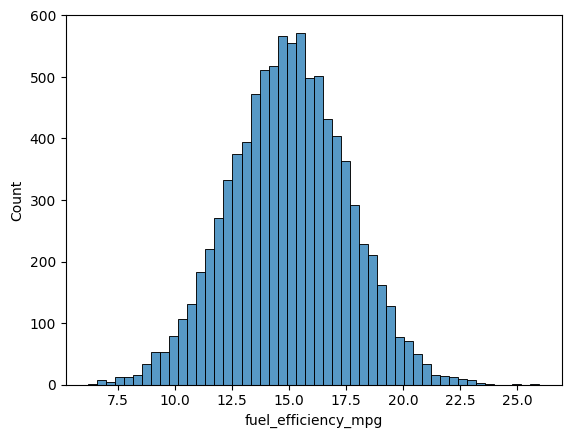

In [709]:
sns.histplot(df1.fuel_efficiency_mpg, bins=50)

In [710]:
n = len(df2)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = int(n * 0.2)

In [711]:
n

9704

In [712]:
n_train, n_val, n_test

(5822, 1940, 1940)

In [713]:
df2.iloc[:10]

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
5,190,NaN,2484.883986,2008,17.271818
6,240,127.0,3006.542287,2012,13.210412
7,150,239.0,3638.657780,2020,12.848884
8,250,174.0,2714.219310,2016,16.823554
9,150,123.0,3509.036569,2005,12.298355


In [714]:
df2_train = df2.iloc[:n_train]
df2_val = df2.iloc[n_train: n_train + n_val]
df2_test = df2.iloc[n_train + n_val:]

In [715]:
idx = np.arange(n)

In [716]:
np.random.seed(42)
np.random.shuffle(idx)

In [717]:
df2_train = df2.iloc[idx[:n_train]]
df2_val = df2.iloc[idx[n_train: n_train + n_val]]
df2_test = df2.iloc[idx[n_train + n_val:]]

df2_train

In [718]:
len(df2_train), len(df2_val), len(df2_test)

(5822, 1940, 1942)

In [719]:
df2_train = df2_train.reset_index(drop=True)
df2_val = df2_val.reset_index(drop=True)
df2_test = df2_test.reset_index(drop=True)

# Filling with Zero

In [720]:
df2_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209


In [721]:
df2_train.isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [722]:
df2_val.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,250,154.0,2254.313245,2002,18.925748
1,210,152.0,2435.203606,2004,17.965284
2,180,112.0,2772.134410,2020,15.366341
3,260,138.0,3014.061530,2022,14.601182
4,140,181.0,3652.186151,2016,12.247032


In [723]:
df2_val.isnull().sum()

engine_displacement      0
horsepower             136
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [724]:
df2_train_mean = df2_train.copy()
df2_val_mean = df2_val.copy()
df2_train_mean.isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [725]:
df2_val['horsepower'] = df2_val['horsepower'].fillna(0)

In [726]:
df2_train['horsepower'] = df2_train['horsepower'].fillna(0)

In [727]:
df2_train['horsepower'].mean()

np.float64(138.52421848162143)

In [728]:
X = df2_train.drop(columns =['fuel_efficiency_mpg'])
y = df2_train['fuel_efficiency_mpg']

In [729]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [730]:
# Train model
model_0 = LinearRegression()
model_0.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [731]:
# Predict and evaluate
preds_0 = model_0.predict(X_test)
rmse_0 = round(np.sqrt(mean_squared_error(y_test, preds_0)), 2)
rmse_0

np.float64(0.52)

# Filling with the mean

In [738]:
df2_train_mean.isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
fuel_efficiency_mpg    0
dtype: int64

In [739]:
np.mean(df2_train_mean['horsepower'])

np.float64(149.54348229185982)

In [741]:
mean = df2_train_copy['horsepower'].mean()
mean

np.float64(149.54348229185982)

In [742]:
df2_train_mean['horsepower'] = df2_train_mean['horsepower'].fillna(mean)
df2_train_mean.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209


In [743]:
df2_train_mean['horsepower'].mean()

np.float64(149.54348229185982)

In [744]:
X = df2_train_mean.drop(columns =['fuel_efficiency_mpg'])
y = df2_train_mean['fuel_efficiency_mpg']

In [745]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [746]:
# Train model
model_0 = LinearRegression()
model_0.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [747]:
# Predict and evaluate
preds_mean = model_0.predict(X_test)
rmse_mean = round(np.sqrt(mean_squared_error(y_test, preds_mean)), 2)
rmse_mean

np.float64(0.45)

# Ridge Regression

In [ ]:
# Split the data into 60% train, 20% validation, 20% test
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42, shuffle=True)

In [ ]:
y_train = df_train[y].values
y_val = df_val[y].values

In [ ]:
# --- 2. Impute Missing 'horsepower' with 0 ---
df_train_0 = df_train.copy()
df_val_0 = df_val.copy()

In [ ]:
# Fill NaNs with 0 as required for this question
df_train_0['horsepower'] = df_train_0['horsepower'].fillna(0)
df_val_0['horsepower'] = df_val_0['horsepower'].fillna(0)

In [ ]:
X_train = df_train_0[features].values
X_val = df_val_0[features].values

In [ ]:
# --- 3. Define Helper Functions for Regularized Regression ---

def rmse(y_true, y_pred):
    """Calculates the Root Mean Squared Error."""
    return np.sqrt(mean_squared_error(y_true, y_pred))

def train_ridge_regression(X, y, r):
    """Trains a Ridge Linear Regression model using the Normal Equation."""
    
    # 1. Prepare X_aug with intercept (column of ones)
    ones = np.ones(X.shape[0])
    X_aug = np.column_stack([ones, X])
    
    # 2. Create the regularization matrix R
    num_features = X.shape[1]
    R = np.eye(num_features + 1)
    # Set r=0 for the intercept term (w0) in the first row/column
    R[0, 0] = 0 
    R *= r
    
    # 3. Solve the system (XTX + R) * w_full = XTy
    XTX = X_aug.T.dot(X_aug)
    XTy = X_aug.T.dot(y)
    w_full = np.linalg.solve(XTX + R, XTy)
    
    # Return w0 (intercept) and w (feature weights)
    return w_full[0], w_full[1:]

def predict(X, w0, w):
    """Makes predictions using the trained weights."""
    y_pred = w0 + X.dot(w)
    return y_pred

# --- 4. Iterate over regularization parameters (r) and evaluate ---

r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_results = []

for r in r_values:
    w0, w = train_ridge_regression(X_train, y_train, r=r)
    y_pred = predict(X_val, w0, w)
    current_rmse = rmse(y_val, y_pred)
    rounded_rmse = round(current_rmse, 2)
    rmse_results.append({'r': r, 'rmse': rounded_rmse})

# --- 5. Print Results ---
print("--- Regularization Results ---")
print("{:<10} {:<10}".format("r", "RMSE"))
print("-" * 20)
for result in rmse_results:
    print("{:<10} {:<10}".format(result['r'], result['rmse']))